In [1]:
import os
import numpy as np

from astropy.table import Table

import matplotlib.pyplot as plt
%matplotlib inline

from astropy.coordinates import SkyCoord 
import astropy.units as u

from sklearn.neighbors import NearestNeighbors
from sklearn import svm, tree
#from IPython.display import Math

D2R = np.pi/180.0

wdir = os.path.expanduser('~') + '/Dropbox/Work/Gaia-QSO'

In [2]:
import matplotlib as mp
import matplotlib.pyplot as plt
mp.rcParams['figure.figsize'] = (12, 8)

In [60]:
# read the Castle xmatch with DR2
url1 = 'http://vospace.esac.esa.int/vospace/sh/9da5bd4b841f4032ee3f94e2f357067a554434?dl=1'
t = Table.read(url1,format='votable')
nt = len(t)
print ("Total number of LQSO is {}".format(nt))

Total number of LQSO is 87


In [4]:
d = t.to_pandas()

In [187]:
d.qso_name = d.qso_name.str.decode('ascii')

In [188]:
d[~np.isnan(d.radius_percentile_lower)]

,qso_name,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,mu,mu_error,test,mu_norm


In [189]:
d.dropna()

,qso_name,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,mu,mu_error,test,mu_norm


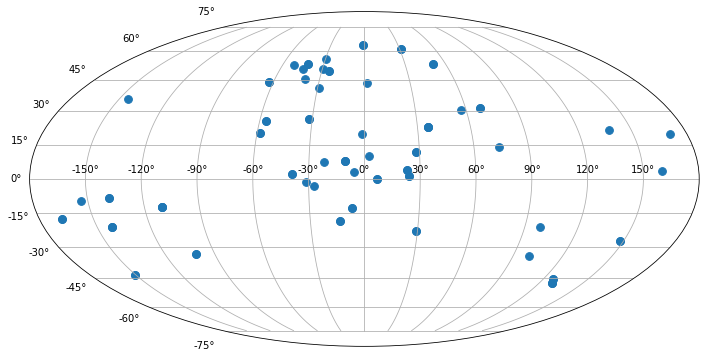

In [190]:
plt.subplot(111,projection="mollweide")
plt.scatter(d.ra*u.deg.to(u.rad)-np.pi,d.dec*u.deg.to(u.rad),s=60)
plt.grid()

In [191]:
coord = SkyCoord(d.ra,d.dec,unit='deg')

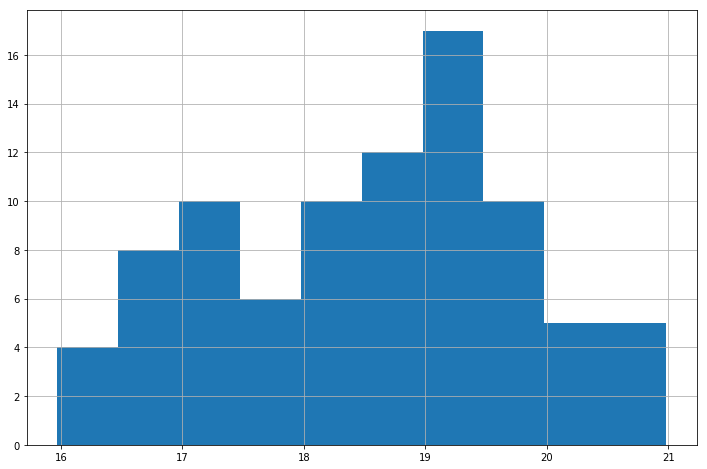

In [192]:
d.phot_g_mean_mag.hist()

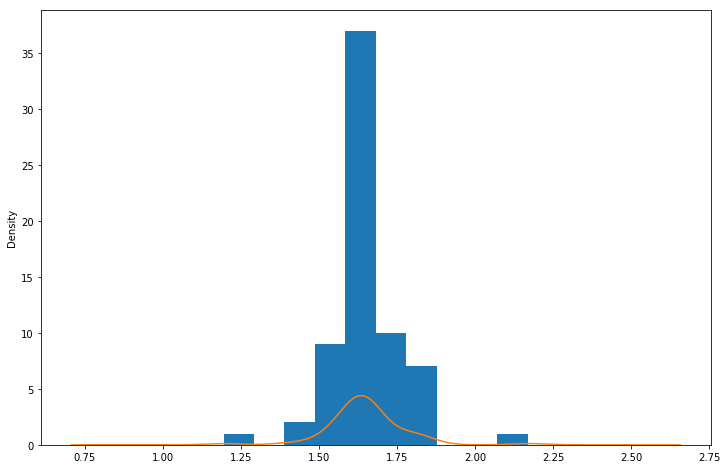

In [193]:
d.astrometric_pseudo_colour.hist()
d.astrometric_pseudo_colour.plot.kde()

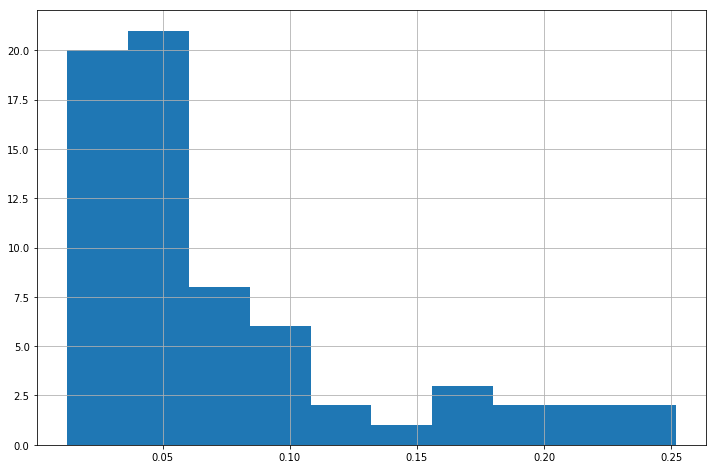

In [194]:
d.astrometric_pseudo_colour_error.hist()

In [195]:
d['test']=d.astrometric_pseudo_colour/d.astrometric_pseudo_colour_error

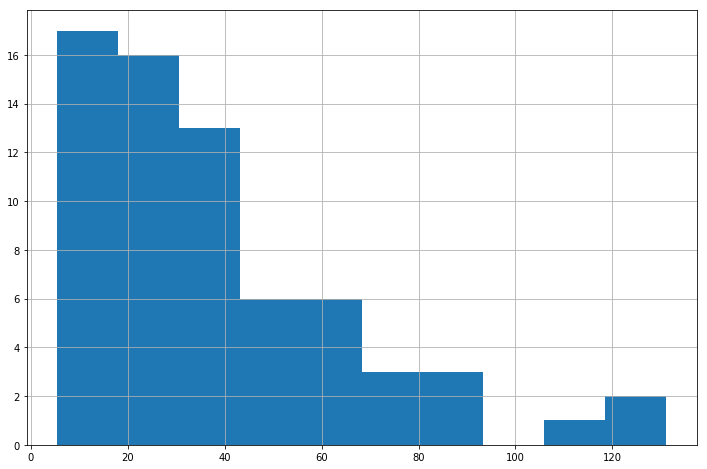

In [196]:
d.test.hist()

In [197]:
d[d['pmra']/d['pmra_error']>1]

,qso_name,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,mu,mu_error,test,mu_norm
9,SDSS0246-0825,1.635721e+18,b'Gaia DR2 5174409201871203584',5.174409e+18,1.631729e+09,2015.5,41.642116,0.192567,-8.426722,0.155014,...,NaN,NaN,NaN,NaN,b'http://geadata.esac.esa.int/data-server/data...,NaN,0.521161,0.344413,41.336882,1.513188
13,HE0435-1223,1.635721e+18,b'Gaia DR2 3178020716638059392',3.178021e+18,6.239779e+08,2015.5,69.562038,0.281801,-12.287763,0.229808,...,NaN,NaN,NaN,NaN,b'http://geadata.esac.esa.int/data-server/data...,NaN,1.863007,0.672422,31.531608,2.770591
20,SDSS0806+2006,1.635721e+18,b'Gaia DR2 670520540381514880',6.705205e+17,4.025962e+08,2015.5,121.598387,0.970990,20.108695,0.899902,...,NaN,NaN,NaN,NaN,b'http://geadata.esac.esa.int/data-server/data...,NaN,2.824066,2.865735,10.290960,0.985460
30,FBQ0951+2635,1.635721e+18,b'Gaia DR2 646884373278812544',6.468844e+17,2.361202e+08,2015.5,147.844039,0.357578,26.587233,0.333475,...,NaN,NaN,NaN,NaN,b'http://geadata.esac.esa.int/data-server/data...,NaN,2.148254,0.733884,27.160640,2.927241
47,SDSS1138+0314,1.635721e+18,b'Gaia DR2 3800591477621812096',3.800591e+18,1.324230e+09,2015.5,174.515633,1.915048,3.249342,0.854941,...,NaN,NaN,NaN,NaN,b'http://geadata.esac.esa.int/data-server/data...,NaN,13.703826,1.869243,10.977953,7.331215
54,SDSS1226-0006,1.635721e+18,b'Gaia DR2 3696663890512658048',3.696664e+18,5.315907e+08,2015.5,186.533398,0.183943,-0.100637,0.125398,...,NaN,NaN,NaN,NaN,b'http://geadata.esac.esa.int/data-server/data...,NaN,3.073242,0.559032,57.628725,5.497440
56,SDSS1332+0347,1.635721e+18,b'Gaia DR2 3712919517094734592',3.712920e+18,1.001981e+09,2015.5,203.094234,1.148485,3.794467,0.786644,...,NaN,NaN,NaN,NaN,b'http://geadata.esac.esa.int/data-server/data...,NaN,4.031667,2.187266,6.541118,1.843245
59,SDSS1353+1138,1.635721e+18,b'Gaia DR2 3727266494569190016',3.727266e+18,5.709597e+08,2015.5,208.276469,0.091563,11.634697,0.060524,...,NaN,NaN,NaN,NaN,b'http://geadata.esac.esa.int/data-server/data...,NaN,0.272516,0.220539,77.201831,1.235684
72,FBQ1633+3134,1.635721e+18,b'Gaia DR2 1324266274238816256',1.324266e+18,8.074889e+08,2015.5,248.454073,0.077589,31.570003,0.081125,...,NaN,NaN,NaN,NaN,b'http://geadata.esac.esa.int/data-server/data...,NaN,0.820032,0.223528,85.236884,3.668588
77,WFI2026-4536,1.635721e+18,b'Gaia DR2 6675746940384195456',6.675747e+18,1.256497e+09,2015.5,306.543486,0.322774,-45.607188,0.260419,...,NaN,NaN,NaN,NaN,b'http://geadata.esac.esa.int/data-server/data...,NaN,4.123960,0.639787,24.979298,6.445833


In [260]:
def wrap180(x):
    """
    wrap longitudes defined on [0 360] degrees to radian defined on [-pi pi]
    why should I use the minus to get the LMC where I want?
    """
    return -Angle(x,unit=u.deg).wrap_at(180*u.deg).rad

def sigma2(ea,ed,c) : 
    res = np.power(ea,2) + np.power(ed,2) 
    res = res + np.sqrt(np.power(ea-ed,2) + np.power(2*ea*ed*c,2))
    return res/2

def setMu(d):
    d['mu'] = np.sqrt(np.power(d.pmra,2)+np.power(d.pmdec,2))
    d['mu_error'] = np.sqrt(sigma2(d.pmra_error,d.pmdec_error,d.pmra_pmdec_corr))
    d['mu_norm'] = d.mu/d.mu_error
    
def getLQSO(d,center,r=10):
    s = d.copy()
    scale = u.arcsecond.to(u.deg)
    s['x'] = (d.ra-center.ra.deg)/scale
    s['y'] = (d.dec-center.dec.deg)/scale
    return s[np.power(s.x,2)+np.power(s.y,2)<r*r].copy()

def plotGaiaLense(dd,center,r=(-4,4),pm=True,title=""):
    d = getLQSO(dd,center)
    scale = u.arcsecond.to(u.deg)
    x = (d.ra-center.ra.deg)/scale
    y = (d.dec-center.dec.deg)/scale
    plt.errorbar(x,y,xerr=d.ra_error, yerr=d.dec_error,fmt='.')
    plt.scatter(x,y,s=100*np.exp(20-d.phot_g_mean_mag),
                c=d.astrometric_pseudo_colour,vmin=1.2,vmax=2,cmap=mp.cm.coolwarm_r)
    plt.colorbar(label="astrometric pseudo color $[\mu m^{-1}]$")
    if pm : 
        vx = d.pmra
        vy = d.pmdec
        plt.quiver(x,y, vx, vy, angles='xy', scale_units='xy', scale=1)
        plt.errorbar(x+vx,y+vy,xerr=d.pmra_error, yerr=d.pmdec_error,fmt='o')
    plt.grid()
    plt.xlabel("gaia.ra - center.ra [\"]")
    plt.ylabel("gaia.dec - center.dec [\"]")
    if(title=="") :
        plt.title(center)
    else :
        plt.title(title)
    plt.xlim(r)
    plt.ylim(r)

In [261]:
setMu(d)

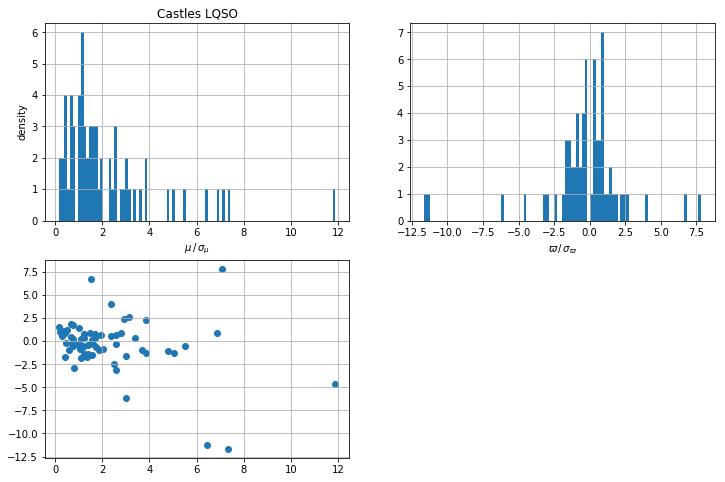

In [242]:
plt.subplot(221)
d.mu_norm.hist(bins=100)
plt.title("Castles LQSO")
plt.ylabel("density")
plt.xlabel("$\mu \, / \, \sigma_{\mu}$")

plt.subplot(222)
d.parallax_over_error.hist(bins=100)
plt.xlabel("$ \\varpi \, / \, \sigma_{\\varpi}$")

plt.subplot(223)
plt.scatter(d.mu_norm,d.parallax_over_error)
plt.grid()

# Lens centers

In [243]:
centers = d.groupby(d.qso_name)['ra','dec'].mean()
centers['coord'] = SkyCoord(centers.ra,centers.dec,unit='degree')
centers['mu_norm'] = d.groupby(d.qso_name).mu_norm.max()
centers = centers.reset_index()

In [244]:
centers.index

RangeIndex(start=0, stop=51, step=1)

In [245]:
centers.loc[[3]]

,qso_name,ra,dec,coord,mu_norm
3,B1152+200,178.826232,19.66173,"<SkyCoord (ICRS): (ra, dec) in deg\n (178.8...",1.329393


out of 100 lensed QSO in Castles catalogue 51 have images in DR2 and 44 have at least one images with proper motion

In [246]:
print(len(centers),len(centers.dropna()))

51 44


In [247]:
len(centers[centers.mu_norm>3])

12

In [248]:
qso_names =  d.qso_name.unique()

In [249]:
HE0435 =  SkyCoord.from_name("HE 0435-1223")

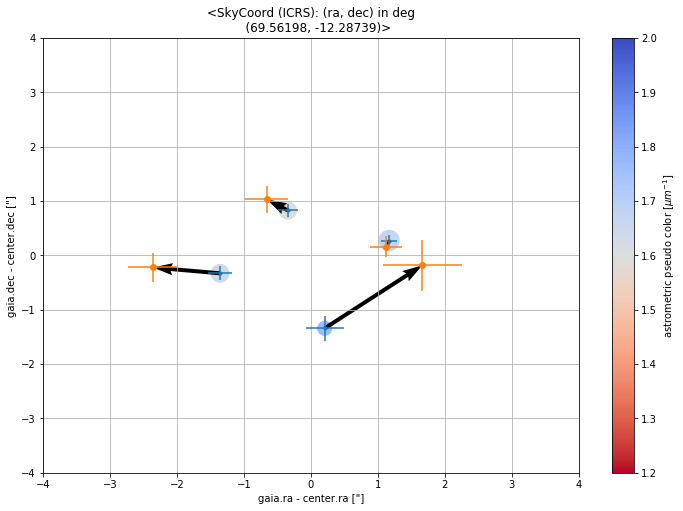

In [262]:
plotGaiaLense(d,HE0435)

In [251]:
qso_names

array(['HE0047-1756', 'Q0142-100', 'QJ0158-4325', 'B0218+357',
       'HE0230-2130', 'SDSS0246-0825', 'HE0435-1223', 'HE0512-3329',
       'SDSS0746+4403', 'SDSS0806+2006', 'HS0810+2554', 'APM08279+5255',
       'SDSS0903+5028', 'SBS0909+523', 'RXJ0921+4529', 'SDSS0924+0219',
       'FBQ0951+2635', 'BRI0952-0115', 'Q0957+561', 'SDSS1001+5027',
       'SDSS1004+4112', 'LBQS1009-0252', 'SDSS1021+4913', 'B1030+074',
       'HE1104-1805', 'PG1115+080', 'RXJ1131-1231', 'SDSS1138+0314',
       'SDSS1155+6346', 'B1152+200', 'SDSS1206+4332', 'Q1208+101',
       'SDSS1226-0006', 'SDSS1332+0347', 'LBQS1333+0113', 'SDSS1353+1138',
       'Q1355-2257', 'SDSS1406+6126', 'B1422+231', 'SBS1520+530',
       'MG1549+3047', 'FBQ1633+3134', 'MG1654+1346', 'PKS1830-211',
       'PMNJ1838-3427', 'WFI2026-4536', 'WFI2033-4723', 'B2108+213',
       'HE2149-2745', 'Q2237+030', 'PSS2322+1944'], dtype=object)

In [252]:
len(qso_names)

51

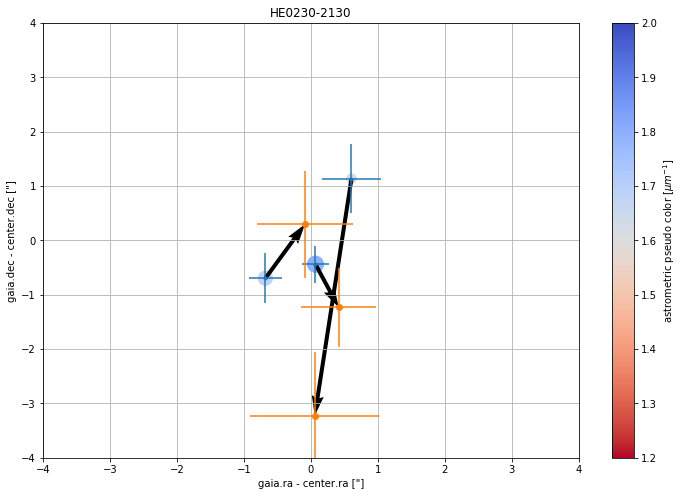

In [263]:
i=10
plotGaiaLense(d,centers.coord[i],title=centers.qso_name[i])

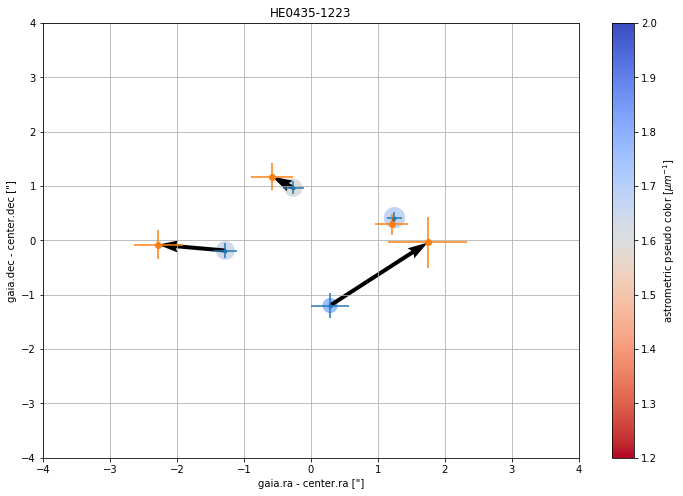

In [264]:
i=11
plotGaiaLense(d,centers.coord[i],title=centers.qso_name[i])

In [257]:
getLQSO(d,HE0435)[['astrometric_pseudo_colour','phot_g_mean_mag','pmra','pmdec']]

,astrometric_pseudo_colour,phot_g_mean_mag,pmra,pmdec
11,1.640356,18.837265,-1.005962,0.107457
12,1.669806,18.575363,-0.042516,-0.116696
13,1.766539,19.301323,1.458574,1.159034
14,1.601444,18.894201,-0.316573,0.204201


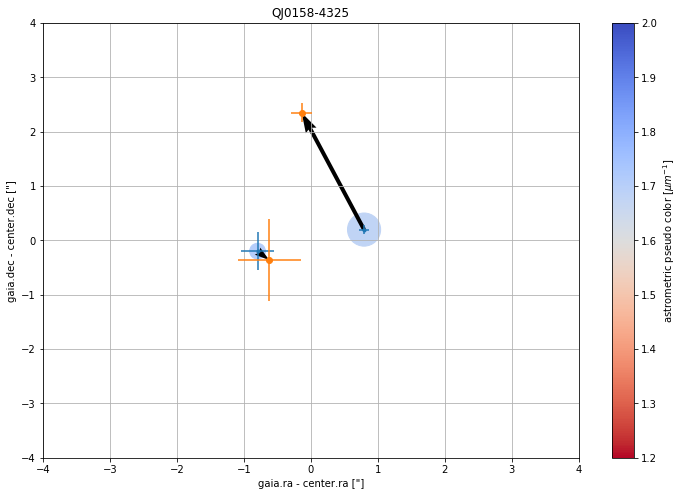

In [268]:
i=29
plotGaiaLense(d,centers.coord[i],title=centers.qso_name[i])

In [271]:
s = getLQSO(d,centers.coord[i])
s.to_clipboard(index=False)
s[['qso_name','astrometric_pseudo_colour','phot_g_mean_mag','phot_g_mean_flux','phot_g_mean_flux_error','pmra','pmdec']]

,qso_name,astrometric_pseudo_colour,phot_g_mean_mag,phot_g_mean_flux,phot_g_mean_flux_error,pmra,pmdec
3,QJ0158-4325,1.679776,17.603382,1713.931980,4.295698,-0.931296,2.149305
4,QJ0158-4325,1.708681,19.091948,435.078265,1.848849,0.175517,-0.165235


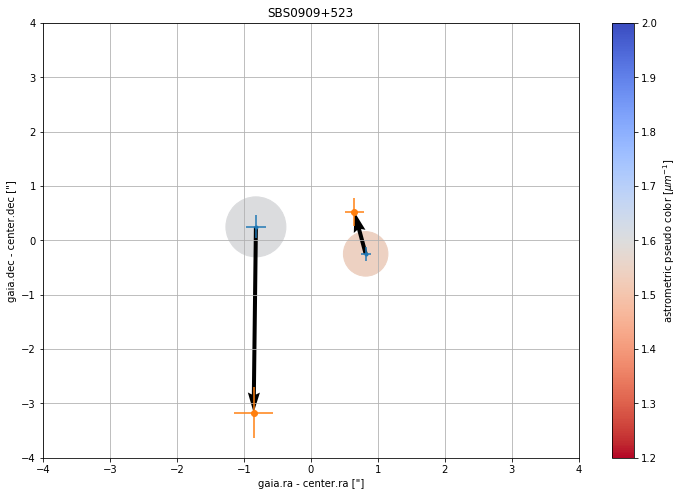

In [266]:
i=32
plotGaiaLense(d,centers.coord[i],title=centers.qso_name[i])

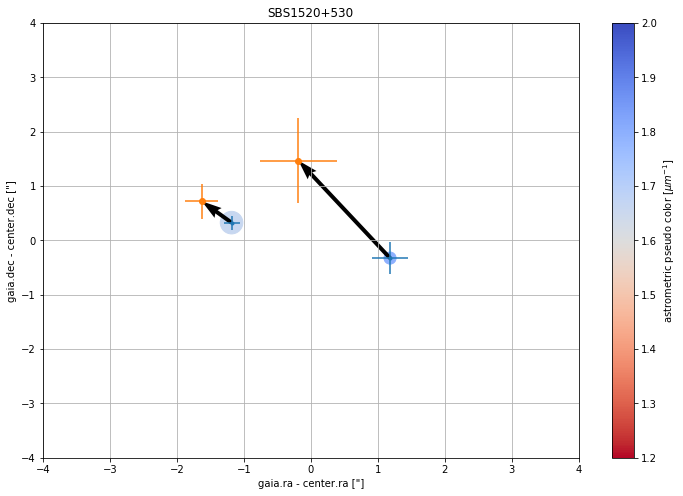

In [272]:
i=33
plotGaiaLense(d,centers.coord[i],title=centers.qso_name[i])

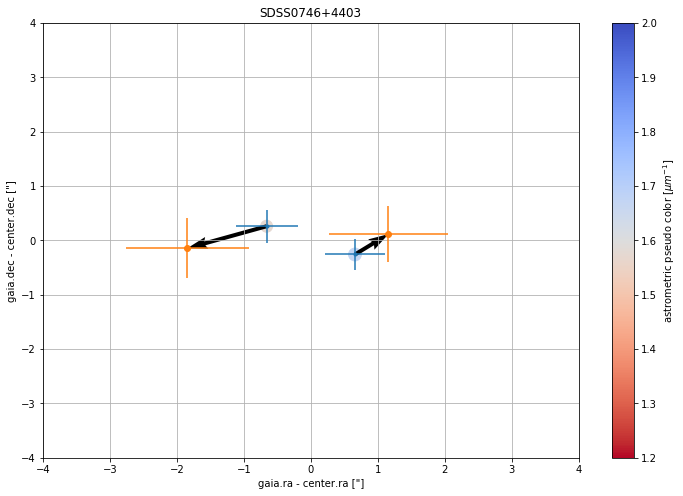

In [273]:
i=35
plotGaiaLense(d,centers.coord[i],title=centers.qso_name[i])

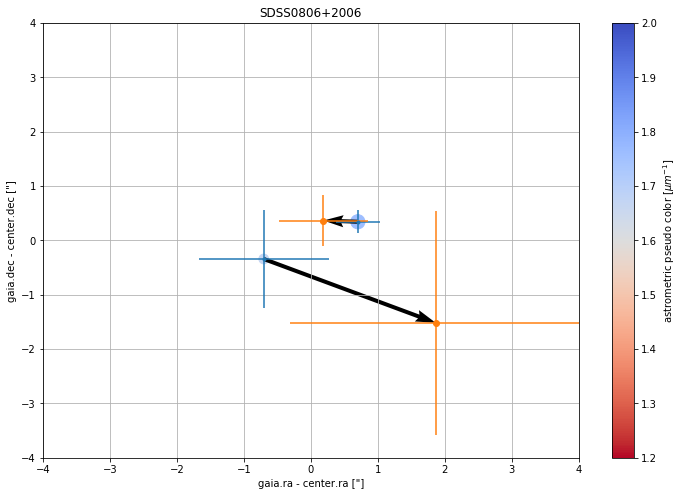

In [274]:
i=36
plotGaiaLense(d,centers.coord[i],title=centers.qso_name[i])

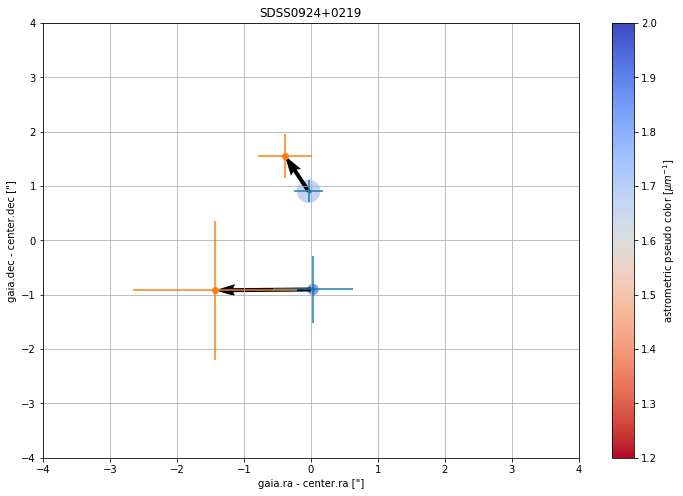

In [275]:
i=38
plotGaiaLense(d,centers.coord[i],title=centers.qso_name[i])

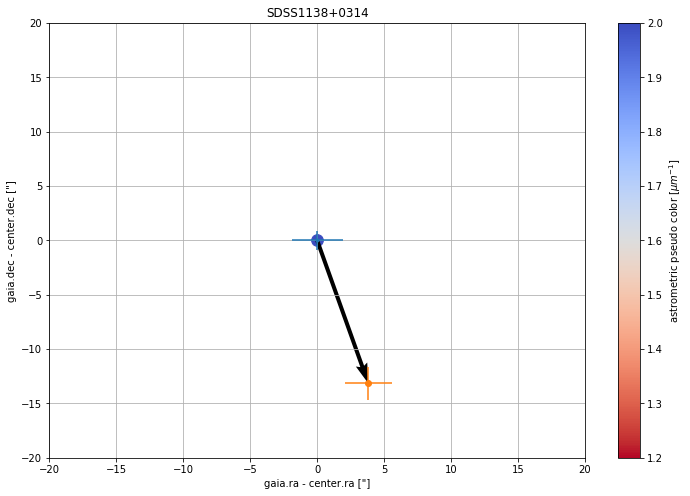

In [278]:
i=42
plotGaiaLense(d,centers.coord[i],title=centers.qso_name[i],r=(-20,20))

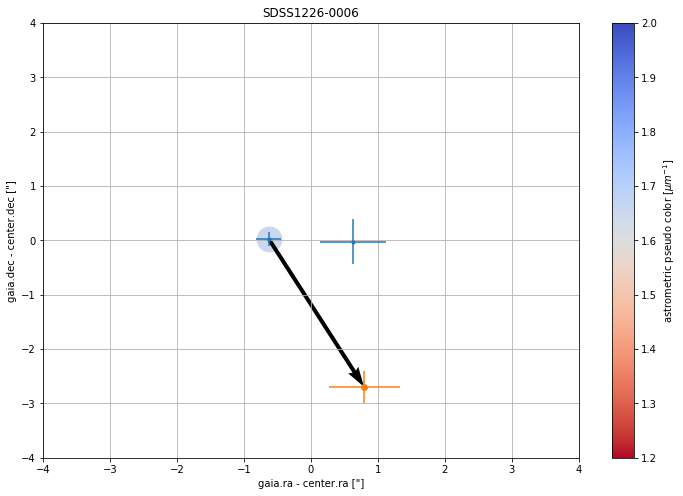

In [279]:
i=45
plotGaiaLense(d,centers.coord[i],title=centers.qso_name[i])

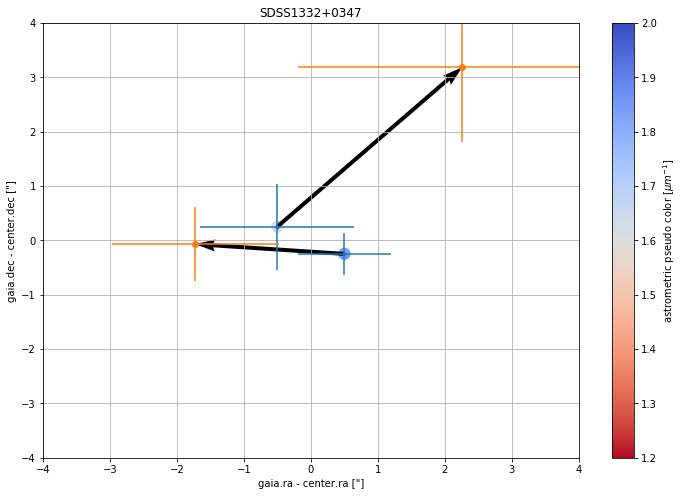

In [280]:
i=46
plotGaiaLense(d,centers.coord[i],title=centers.qso_name[i])

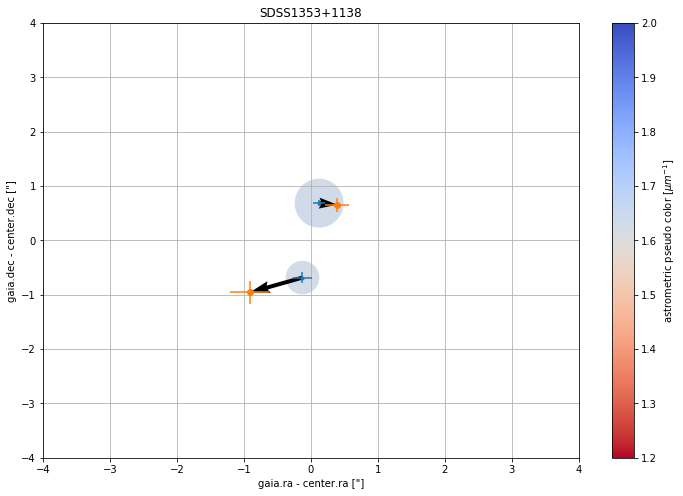

In [281]:
i=47
plotGaiaLense(d,centers.coord[i],title=centers.qso_name[i])

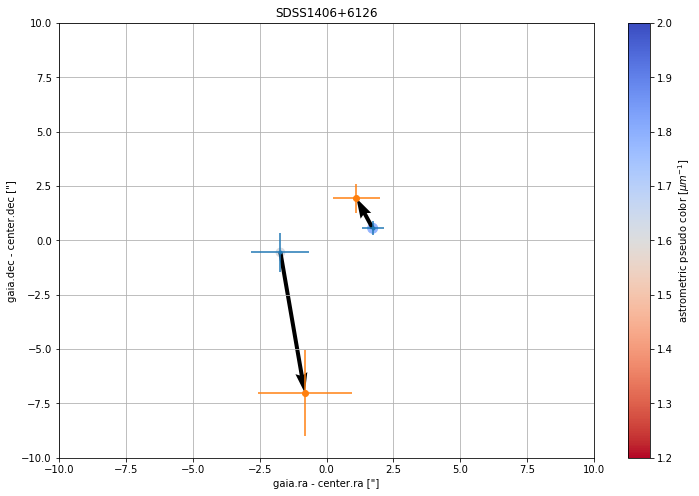

In [283]:
i=48
plotGaiaLense(d,centers.coord[i],title=centers.qso_name[i],r=(-10,10))

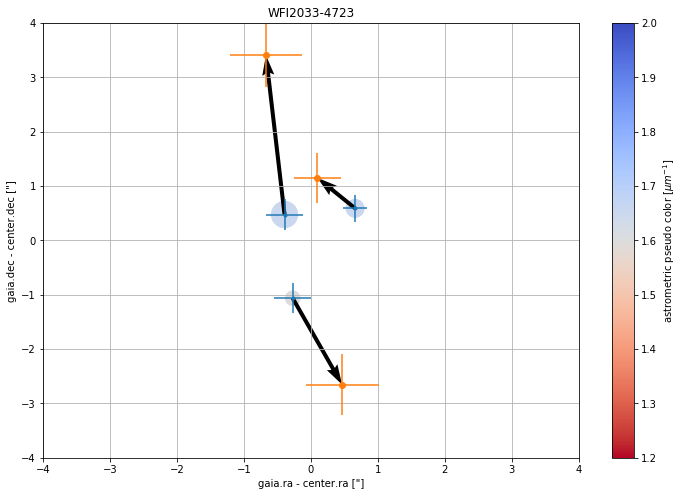

In [284]:
i=50
plotGaiaLense(d,centers.coord[i],title=centers.qso_name[i])

In [285]:
d.to_csv("../data/castleDR2.csv")

In [288]:
centers[centers.qso_name=='FBQ1633+3134']

,qso_name,ra,dec,coord,mu_norm
8,FBQ1633+3134,248.454158,31.569947,"<SkyCoord (ICRS): (ra, dec) in deg\n (248.4...",3.668588


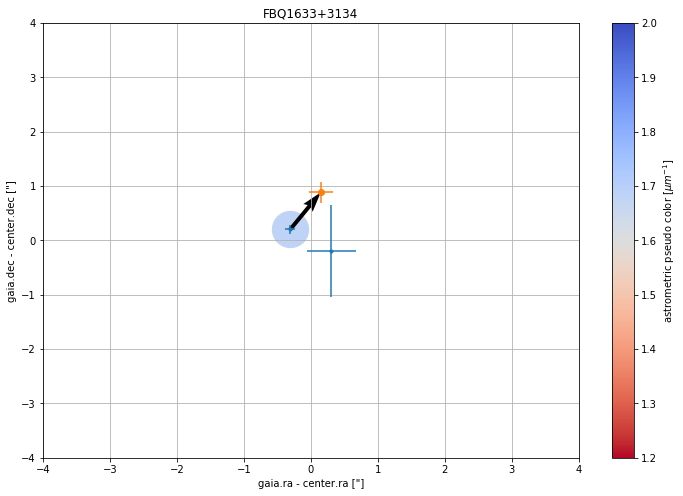

In [289]:
i=8
plotGaiaLense(d,centers.coord[i],title=centers.qso_name[i])

In [290]:
centers[centers.qso_name=='PG1115+080']

,qso_name,ra,dec,coord,mu_norm
20,PG1115+080,169.570484,7.766173,"<SkyCoord (ICRS): (ra, dec) in deg\n (169.5...",3.839303


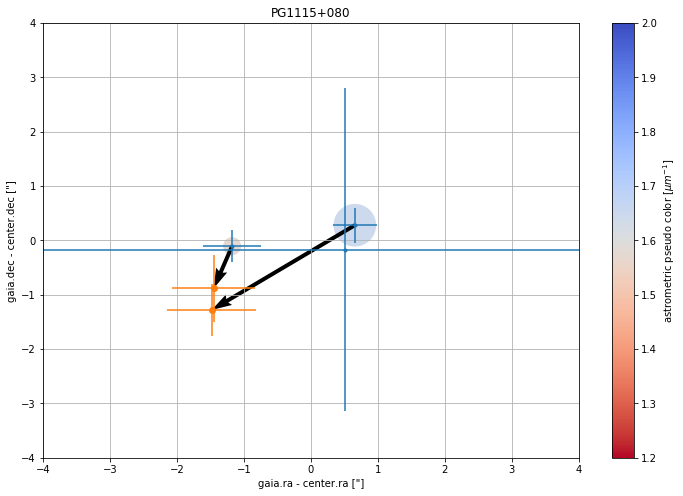

In [291]:
i=20
plotGaiaLense(d,centers.coord[i],title=centers.qso_name[i])